In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

In [28]:
df = pd.read_csv('../processed_data/GPT_reasoning_250.csv',dtype=str)

In [29]:
df = df.fillna('')
df['Opioid User Status'].value_counts()

Opioid User Status
Non-Opioid User          136
Opioid User              102
User (Status Unknown)     10
Unknown                    1
Name: count, dtype: int64

In [30]:
df['Foods'] = df['Foods'].str.split(';')
df['Habits'] = df['Habits'].str.split(';')
exploded_foods = df.explode('Foods')
exploded_habits = df.explode('Habits')

exploded_habits['Habits'] = exploded_habits['Habits'].map(lambda x: x.strip())
exploded_foods['Foods'] = exploded_foods['Foods'].map(lambda x: x.strip())

In [31]:
# Group by 'Opioid User Status' and count unique items in 'Foods' and 'Habits'
food_counts = exploded_foods.groupby(['Foods']).size().reset_index(name='Count')
habit_counts = exploded_habits.groupby(['Habits']).size().reset_index(name='Count')

In [32]:
# Group by Foods and Opioid User Status, then count
food_user_counts = exploded_foods.groupby(['Foods', 'Opioid User Status']).size().reset_index(name='Count')

# Pivot the table to have separate columns for Opioid and Non-Opioid User counts
pivot_table = food_user_counts.pivot(index='Foods', columns='Opioid User Status', values='Count').reset_index()

# Rename the columns for clarity
pivot_table.columns = ['Foods', 'Non-Opioid User Count', 'Opioid User Count', 'Unknown1', 'Unknown2']

# Replace NaN with 0 if there are foods not consumed by one of the groups
pivot_table = pivot_table.fillna(0)

# Convert counts to integers (if they are floats)
pivot_table['Non-Opioid User Count'] = pivot_table['Non-Opioid User Count'].astype(int)
pivot_table['Opioid User Count'] = pivot_table['Opioid User Count'].astype(int)


In [33]:
pivot_table

,Foods,Non-Opioid User Count,Opioid User Count,Unknown1,Unknown2
0,Almond butter,1,0,0.0,0.0
1,"Almond milk, sweetened, chocolate",0,1,0.0,0.0
2,"Almonds, NFS",1,0,0.0,0.0
3,"Almonds, dry roasted, salted",2,0,0.0,0.0
4,"Almonds, dry roasted, without salt",1,0,0.0,0.0
...,...,...,...,...,...
1004,"Yogurt, vanilla, nonfat milk",0,1,0.0,0.0
1005,"Yogurt, vanilla, whole milk",1,0,0.0,0.0
1006,"Yogurt, whole milk, fruit",1,0,0.0,0.0
1007,"Yogurt, whole milk, plain",1,0,0.0,0.0


In [34]:
food_counts

,Foods,Count
0,Almond butter,1
1,"Almond milk, sweetened, chocolate",1
2,"Almonds, NFS",1
3,"Almonds, dry roasted, salted",2
4,"Almonds, dry roasted, without salt",1
...,...,...
1004,"Yogurt, vanilla, nonfat milk",1
1005,"Yogurt, vanilla, whole milk",1
1006,"Yogurt, whole milk, fruit",1
1007,"Yogurt, whole milk, plain",1


In [35]:
habit_counts_opioid = exploded_habits[exploded_habits['Opioid User Status'] == 'Opioid User'].groupby(['Habits']).size().reset_index(name='Count')
habit_counts_nonopioid = exploded_habits[exploded_habits['Opioid User Status'] == 'Non-Opioid User'].groupby(['Habits']).size().reset_index(name='Count')

In [36]:
habit_counts.to_csv('../processed_data/habit_counts.csv', index=False)

In [37]:
habit_counts

,Habits,Count
0,,3
1,Adds little to no salt at table,48
2,Adds lots of salt at table,37
3,Ate less food than usual,9
4,Ate more food than usual,28
...,...,...
60,Sources water from the tap,27
61,Takes few or no supplements,49
62,Takes more supplements,41
63,Uses little to no salt in preparation,51


In [38]:
habit_counts_nonopioid

,Habits,Count
0,,3
1,Adds little to no salt at table,32
2,Adds lots of salt at table,12
3,Ate less food than usual,6
4,Ate more food than usual,12
5,Buys organic food,2
6,Checks fast food nutrition info,3
7,Checks nutrition info at restaurant,1
8,Checks nutrition info of fast food,7
9,Claims to have a good diet,26


In [39]:
habit_counts_opioid

,Habits,Count
0,Adds little to no salt at table,14
1,Adds lots of salt at table,23
2,Ate less food than usual,3
3,Ate more food than usual,16
4,Avoiding tap water,1
5,Buys organic food,5
6,Checks fast food nutrition info,4
7,Checks nutrition info at restaurant,1
8,Checks nutrition info of fast food,12
9,Claims to have a good diet,8


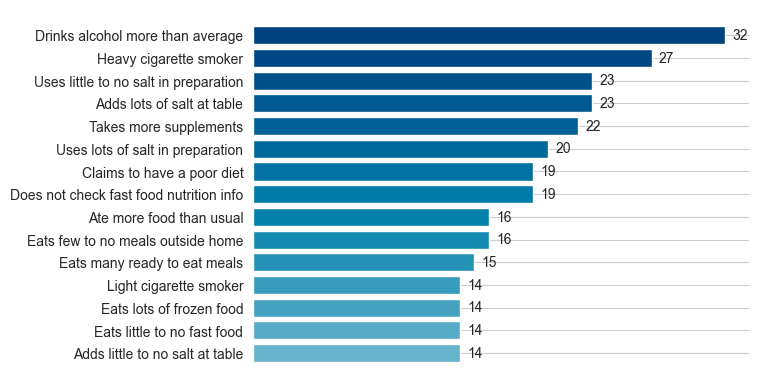

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = habit_counts_opioid

# Sort the data based on counts and select the top 15
sorted_data = data.sort_values(by='Count', ascending=False).head(15)
# Prepare a list of colors using the 'plasma' colormap
colors = plt.cm.ocean(np.linspace(0.8, 0.5, len(sorted_data)))

# Create a horizontal bar plot
bars = plt.barh(sorted_data['Habits'][::-1], sorted_data['Count'][::-1], color=colors)

# # Add count labels on the bars
# for index, value in enumerate(sorted_data['Count'][::-1]):
#     plt.text(value, index, ' '+str(value))

# Add count labels on the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.5  # adjust this value to move the label left or right
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center')


# Remove the axes and frame
axes = plt.gca()
axes.get_xaxis().set_visible(False)
for spine in axes.spines.values():
    spine.set_visible(False)
#axes.set_xlim(30, max(sorted_data['Count']) + 5)  # Adjust the max limit if necessary

# Set labels for y-axis
plt.yticks(sorted_data['Habits'])


plt.show()


C:\Users\zzhang42\AppData\Local\Temp\ipykernel_35528\3820975136.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(wrap_labels(top_nonopioid['Habits'], 20), fontsize=15)  # Adjust 'width' as needed
C:\Users\zzhang42\AppData\Local\Temp\ipykernel_35528\3820975136.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(wrap_labels(top_opioid['Habits'], 20), fontsize=15)  # Adjust 'width' as needed


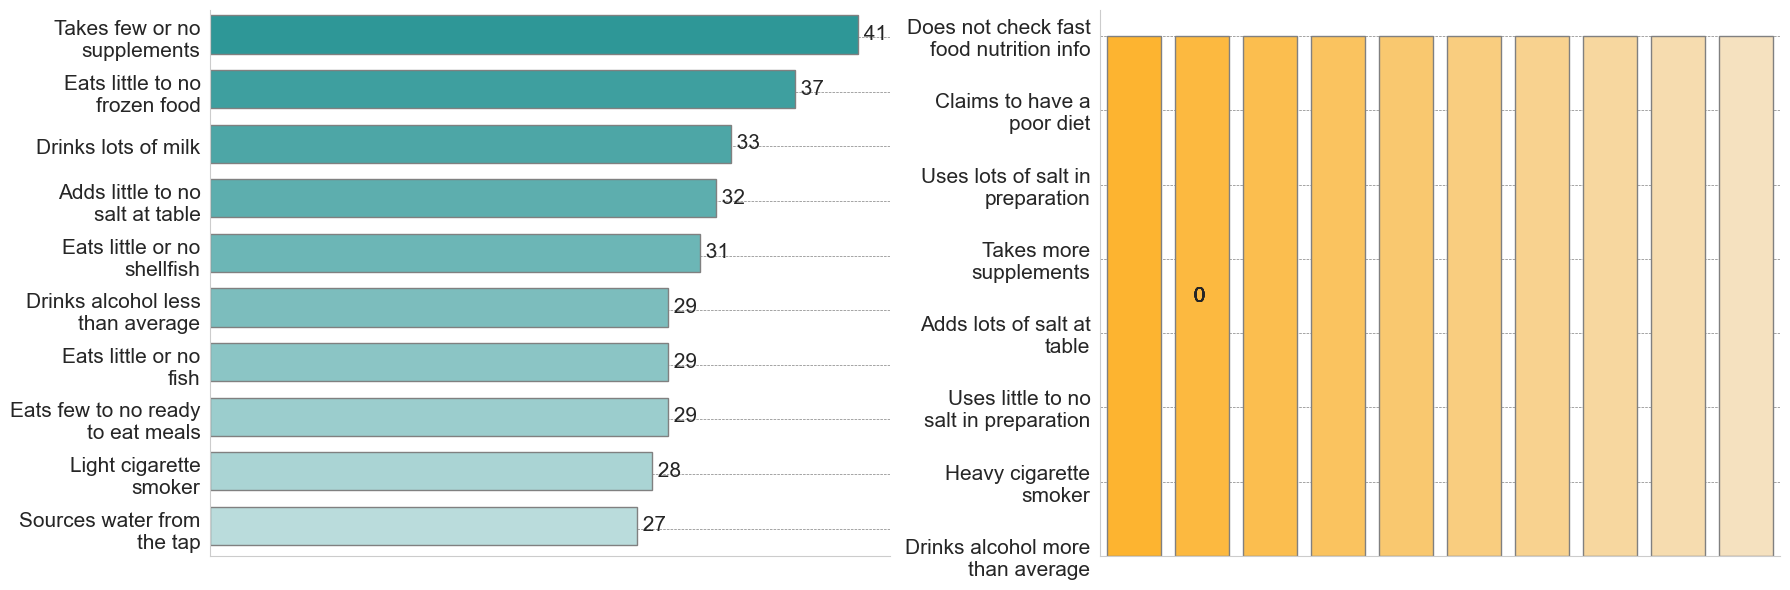

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Improved function for wrapping text
def wrap_labels(labels, width):
    wrapped_labels = []
    for label in labels:
        words = label.split()
        wrapped_label = ''
        line = ''
        for word in words:
            if len(line) + len(word) <= width:
                line += word + ' '
            else:
                wrapped_label += line.strip() + '\n'
                line = word + ' '
        wrapped_label += line.strip()
        wrapped_labels.append(wrapped_label)
    return wrapped_labels

# Sort and select top 10 for each dataset
top_nonopioid = habit_counts_nonopioid.sort_values(by='Count', ascending=False).head(10)
top_opioid = habit_counts_opioid.sort_values(by='Count', ascending=False).head(10)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Function to create gradient colors
def gradient_bars(bars, color):
    grad = np.linspace(0.8, 0.2, len(bars))
    for bar, g in zip(bars, grad):
        bar.set_facecolor(color(g))

def add_value_labels(ax):
    for bar in ax.patches:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                f' {int(bar.get_width())}',
                va='center', ha='left', fontsize=15)

# Plot for Non-Opioid
bars = sns.barplot(ax=axes[0], x='Count', y='Habits', data=top_nonopioid, color='#008080', edgecolor='gray', height=0.7)
axes[0].set_title('')
axes[0].set_ylabel('')
axes[0].set_yticklabels(wrap_labels(top_nonopioid['Habits'], 20), fontsize=15)  # Adjust 'width' as needed
axes[0].set_xlabel('')
axes[0].set_xticks([])
gradient_bars(bars.patches, sns.light_palette("teal", n_colors=9, as_cmap=True))
add_value_labels(axes[0])

# Plot for Opioid
bars = sns.barplot(ax=axes[1], x='Count', y='Habits', data=top_opioid, color='red', edgecolor='gray', height=0.7)
axes[1].set_title('')
axes[1].set_ylabel('')
axes[1].set_yticklabels(wrap_labels(top_opioid['Habits'], 20), fontsize=15)  # Adjust 'width' as needed
axes[1].set_xlabel('')
axes[1].set_xticks([])
gradient_bars(bars.patches, sns.light_palette("orange", n_colors=9, as_cmap=True))
add_value_labels(axes[1])

# Improve the aesthetics
sns.despine()
for ax in axes:
    ax.grid(True, linestyle='--', linewidth='0.5', color='gray')  # Dotted grid lines
plt.tight_layout()
plt.show()



C:\Users\zzhang42\AppData\Local\Temp\ipykernel_35528\1419542155.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(wrap_labels(top_nonopioid['Habits'], 20), fontsize=15, rotation=90)  # Adjust 'width' as needed
C:\Users\zzhang42\AppData\Local\Temp\ipykernel_35528\1419542155.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(wrap_labels(top_opioid['Habits'], 20), fontsize=15, rotation=90)  # Adjust 'width' as needed


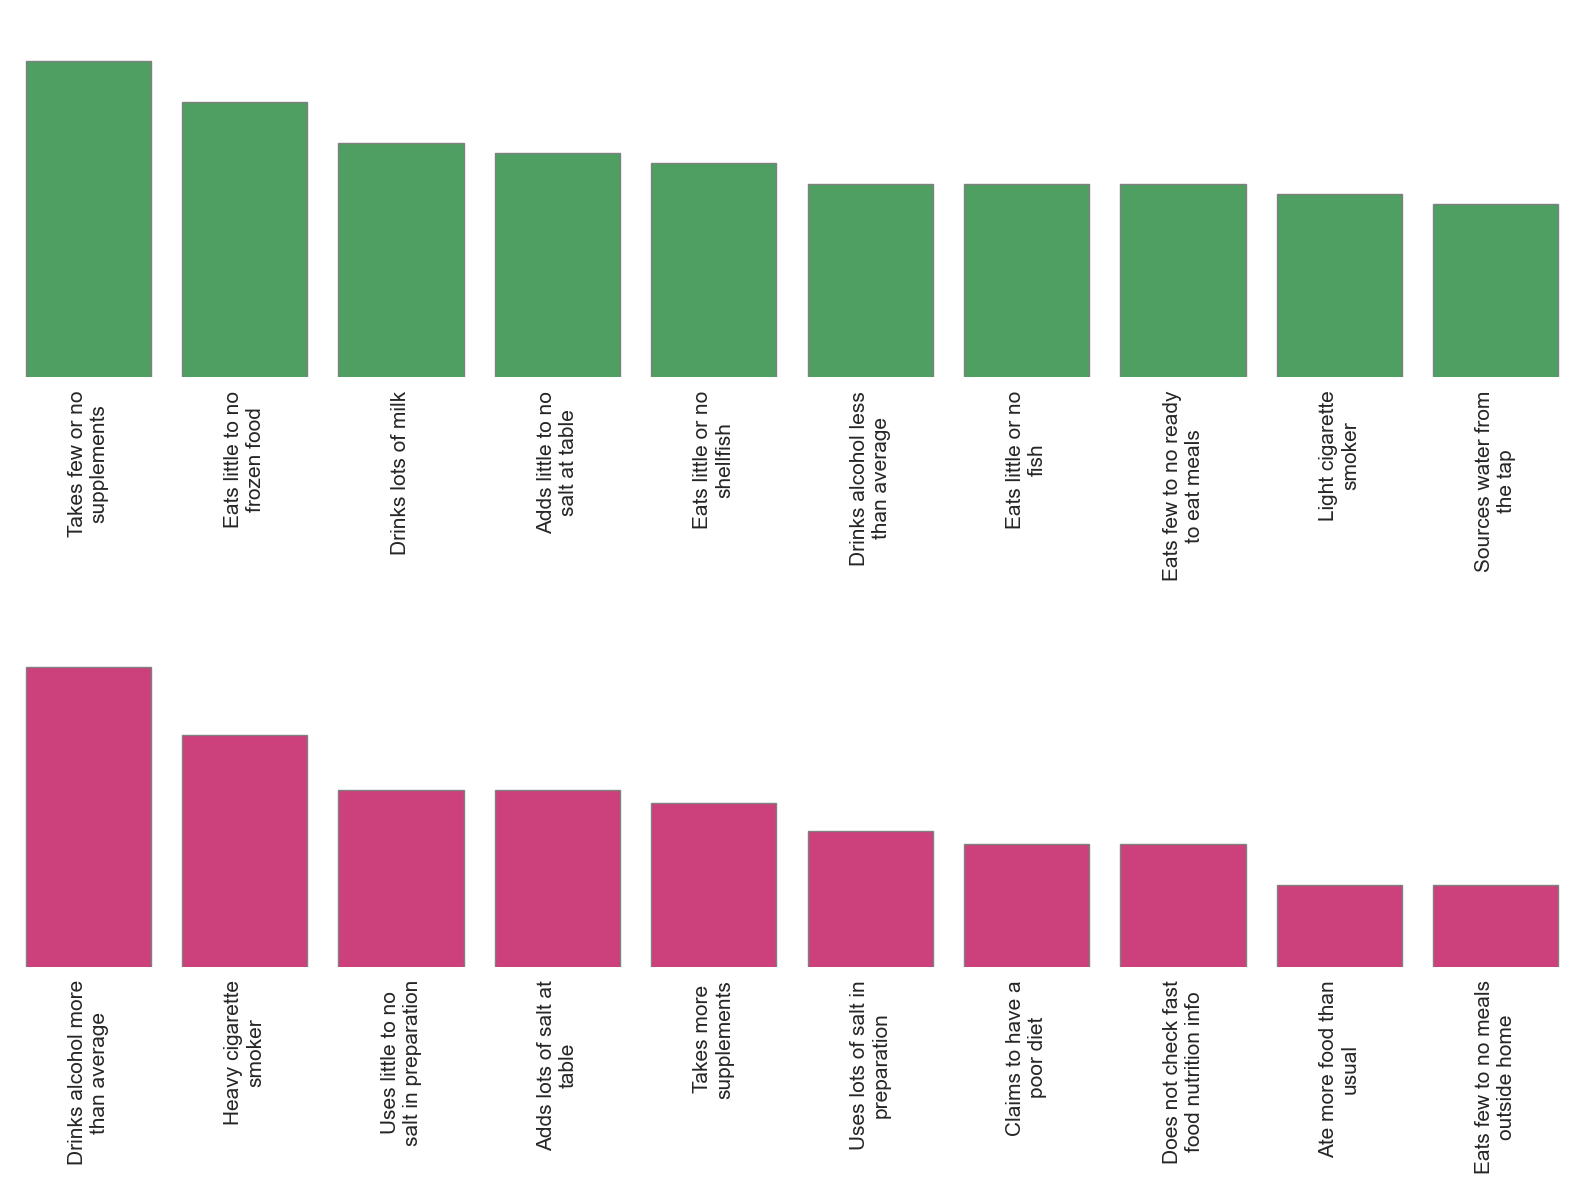

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Improved function for wrapping text
def wrap_labels(labels, width):
    wrapped_labels = []
    for label in labels:
        words = label.split()
        wrapped_label = ''
        line = ''
        for word in words:
            if len(line) + len(word) <= width:
                line += word + ' '
            else:
                wrapped_label += line.strip() + '\n'
                line = word + ' '
        wrapped_label += line.strip()
        wrapped_labels.append(wrapped_label)
    return wrapped_labels

# Sort and select top 10 for each dataset
top_nonopioid = habit_counts_nonopioid.sort_values(by='Count', ascending=False).head(10)
top_opioid = habit_counts_opioid.sort_values(by='Count', ascending=False).head(10)

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 1, figsize=(16, 12))  # Changed to 1 row, 2 columns

def add_value_labels(ax):
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                f' {int(bar.get_height()+2)}',
                va='bottom', ha='center', fontsize=15)

# Plot for Non-Opioid
sns.barplot(ax=axes[0], y='Count', x='Habits', data=top_nonopioid, color='#40AD5A', edgecolor='gray')
axes[0].set_title('')
axes[0].set_xlabel('')
axes[0].set_xticklabels(wrap_labels(top_nonopioid['Habits'], 20), fontsize=15, rotation=90)  # Adjust 'width' as needed
axes[0].set_ylabel('')
axes[0].set_yticks([])
axes[0].set_ylim(10, top_nonopioid['Count'].max() + 5)  # Set y-axis limit starting from 10
# add_value_labels(axes[0])

# Plot for Opioid
sns.barplot(ax=axes[1], y='Count', x='Habits', data=top_opioid, color='#E32977', edgecolor='gray')
axes[1].set_title('')
axes[1].set_xlabel('')
axes[1].set_xticklabels(wrap_labels(top_opioid['Habits'], 20), fontsize=15, rotation=90)  # Adjust 'width' as needed
axes[1].set_ylabel('')
axes[1].set_yticks([])
axes[1].set_ylim(10, top_opioid['Count'].max() + 5)  # Set y-axis limit starting from 10
# add_value_labels(axes[1])

# Set a white background
sns.set(style="whitegrid", color_codes=True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [39]:
bars = sns.barplot(ax=axes[1], x='Count', y='Habits', data=top_opioid, color='red', edgecolor='gray', height=0.5)

In [40]:
bars = sns.barplot(ax=axes[1], x='Count', y='Habits', data=top_opioid, color='red', edgecolor='black', height=0.7)

C:\Users\zzhang42\AppData\Local\Temp\ipykernel_28472\2714661874.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(wrap_labels(top_nonopioid['Habits'], 20))  # Adjust 'width' as needed
C:\Users\zzhang42\AppData\Local\Temp\ipykernel_28472\2714661874.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(wrap_labels(top_opioid['Habits'], 20))  # Adjust 'width' as needed


<Figure size 640x480 with 0 Axes>

In [31]:
import torch
graph = torch.load('../processed_data/heterogeneous_graph_768_no_med_balanced_with_prompt.pt')

D:\anaconda\envs\Jason_2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [108]:
graph['ingredient'].prompt

['Ingredient Node: The ingredient description is: Milk, human, mature, fluid (For Reference Only).',
 'Ingredient Node: The ingredient description is: Milk, nonfat, fluid, with added vitamin A and vitamin D (fat free or skim).',
 'Ingredient Node: The ingredient description is: Milk, lowfat, fluid, 1% milkfat, with added vitamin A and vitamin D.',
 'Ingredient Node: The ingredient description is: Milk, reduced fat, fluid, 2% milkfat, with added vitamin A and vitamin D.',
 'Ingredient Node: The ingredient description is: Milk, whole, 3.25% milkfat, with added vitamin D.',
 'Ingredient Node: The ingredient description is: Milk, fluid, nonfat, calcium fortified (fat free or skim).',
 'Ingredient Node: The ingredient description is: Milk, buttermilk, fluid, cultured, lowfat.',
 'Ingredient Node: The ingredient description is: Milk, buttermilk, fluid, cultured, reduced fat.',
 'Ingredient Node: The ingredient description is: Milk, buttermilk, fluid, whole.',
 'Ingredient Node: The ingredien

In [ ]:
food2ingredient = generate_edge_mapping(graph, ('food', 'contains', 'ingredient'))

In [118]:
from fuzzywuzzy import process

D:\anaconda\envs\Jason_2\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [191]:
df_food = pd.read_csv('../processed_data/attention_result_food.csv')
food_list = []
for prompt in graph['food'].prompt:
    food_list.append(extract_food_description(prompt))


food_index_list = []
count = 0
for food in tqdm(food_counts['Foods'].tolist()):
    if food not in food_list:
        food = process.extractOne(food, food_list)[0]
    food_index_list.append(food_list.index(food))

100%|██████████| 1009/1009 [32:24<00:00,  1.93s/it] 


In [261]:
food_counts

,Foods,Count
0,Almond butter,1
1,"Almond milk, sweetened, chocolate",1
2,"Almonds, NFS",1
3,"Almonds, dry roasted, salted",2
4,"Almonds, dry roasted, without salt",1
...,...,...
1004,"Yogurt, vanilla, nonfat milk",1
1005,"Yogurt, vanilla, whole milk",1
1006,"Yogurt, whole milk, fruit",1
1007,"Yogurt, whole milk, plain",1


In [192]:
base_text = """Opioid users tend to have unhealthy dietary patterns different from regular people. We have developed a model to predict if a user is an opioid user based on his dietary habits and food intake history and give back recommendations on which foods and habits most support the decision. Your task is to act as a nutritionist to help me further filter the list: First, based on the model's finding, use your general knowledge to find the ingredient that support the decision most. For example, chronic opioid users often have unhealthy dietary patterns, favoring salty, sweet, and fried foods, while non-opioid users can have various healthy diet patterns. So if sugar is an ingredient of a pie, this would be the most contributing factor. Finally, the most important thing to bear in mind is that the ingredients can have a long name, you must filter out only the words that serve as ingredients, for example, I want 'almond milk' out of 'ready-to-drink almond milk without fat.', since this output will be used by the downstream task, you must output a string in the format: ANSWER: XX; XX; .... with XX being each ingredient and nothing more (No other words in response as explanation). If there is no ingredient. Just Output 'No Answer'. \n """

In [201]:
prompted_text_list = []
for index in food_index_list:
    row = df_food.iloc[index]
    if pd.isna(row['top_ingredient_desc']):
        continue
    text = f"""
    The model think the ingredient support the decisions are: {row['top_ingredient_desc']}.  \n
    The rest of ingredients include: {row['all_ingredient_desc']}.
    """
    prompted_text = base_text + text
    prompted_text_list.append(prompted_text)

In [238]:
len(food_index_list)

1009

In [279]:
pivot_table

,Foods,Non-Opioid User Count,Opioid User Count,Unknown1,Unknown2
0,Almond butter,1,0,0.0,0.0
1,"Almond milk, sweetened, chocolate",0,1,0.0,0.0
2,"Almonds, NFS",1,0,0.0,0.0
3,"Almonds, dry roasted, salted",2,0,0.0,0.0
4,"Almonds, dry roasted, without salt",1,0,0.0,0.0
...,...,...,...,...,...
1004,"Yogurt, vanilla, nonfat milk",0,1,0.0,0.0
1005,"Yogurt, vanilla, whole milk",1,0,0.0,0.0
1006,"Yogurt, whole milk, fruit",1,0,0.0,0.0
1007,"Yogurt, whole milk, plain",1,0,0.0,0.0


In [280]:
mask = [not pd.isna(df_food.iloc[index]['top_ingredient_desc']) for index in food_index_list]
filtered_pivot_table = pivot_table[mask]

In [281]:
len(filtered_pivot_table)

873

In [239]:
len(prompted_text_list)

873

In [241]:
from openai import OpenAI
client = OpenAI()
def query(prompt):
    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
        {"role": "system", "content": "You are a nutritionist."},
        {"role": "user", "content": prompt}
      ]
    )
    return response.choices[0].message.content

In [242]:
import time
GPT_reasoning = []
for prompt in tqdm(prompted_text_list):
    reasoning = query(prompt)
    time.sleep(10)
    GPT_reasoning.append(reasoning)

100%|██████████| 873/873 [2:49:40<00:00, 11.66s/it]    


In [260]:
GPT_reasoning

['ANSWER: Nuts; almond butter',
 'ANSWER: Beverages; almond milk; chocolate; ready-to-drink.',
 'ANSWER: Nuts; almonds; dry roasted',
 'ANSWER: Nuts; almonds; vegetable oil; salt',
 'ANSWER: Nuts; almonds; vegetable oil; salt.',
 'ANSWER: Grapes; Apples; Nuts',
 'ANSWER: Apples, granny smith, with skin, raw; Apples, gala, with skin, raw; Apples, fuji, with skin, raw',
 'ANSWER: Asparagus; Salt',
 'ANSWER: Asparagus; Salt',
 'ANSWER: Avocados',
 'ANSWER: Babyfood, Baby MUM MUM Rice Biscuits; Babyfood, GERBER, GRADUATES Lil Biscuits Vanilla Wheat',
 'ANSWER: Babyfood; vegetables; squash; strained',
 'ANSWER: Babyfood; vegetables; sweet potatoes strained',
 'ANSWER: Beef; cured; breakfast strips; cooked',
 'ANSWER: fast foods; submarine sandwich; bacon; lettuce; tomato; white bread',
 'ANSWER: onion; poppy; sesame',
 'ANSWER: Bagels; wheat',
 'ANSWER: Bagels; onion; poppy; sesame; Blueberries.',
 'ANSWER: Snacks; banana chips',
 'ANSWER: Bananas; Bananas',
 'ANSWER: Babyfood; fruit; banan

In [243]:
import pickle
with open('../processed_data/GPT_reasoning_ingredient.pkl', 'wb') as file:
    pickle.dump(GPT_reasoning, file)

In [282]:
filtered_pivot_table['GPT_reasoning'] = [item[8:].split(';') for item in GPT_reasoning]

C:\Users\zzhang42\AppData\Local\Temp\ipykernel_20848\3538386864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pivot_table['GPT_reasoning'] = [item[8:].split(';') for item in GPT_reasoning]


In [284]:
df_ing = filtered_pivot_table[['Non-Opioid User Count', 'Opioid User Count', 'GPT_reasoning']]

In [333]:
df_ing

,Non-Opioid User Count,Opioid User Count,GPT_reasoning
0,1,0,"[Nuts, almond butter]"
1,0,1,"[Beverages, almond milk, chocolate, ready-t..."
2,1,0,"[Nuts, almonds, dry roasted]"
5,0,1,"[Nuts, almonds, vegetable oil, salt]"
6,1,0,"[Nuts, almonds, vegetable oil, salt.]"
...,...,...,...
1000,1,0,"[Yogurt, Milk, Jams, Preserves, Vitamin D]"
1001,1,0,"[Yogurt, plain, skim milk, Vitamin D]"
1006,1,0,"[Yogurt, plain, whole milk, Jams, preserve..."
1007,1,0,"[Yogurt, plain, whole milk, Vitamin D]"


In [335]:
# Assuming your DataFrame is named df with columns 'Non-Opioid User Count', 'Opioid User Count', and 'GPT_reasoning'
# where 'GPT_reasoning' is a list of ingredients for each row.

# Explode the GPT_reasoning column
exploded_df = df_ing.explode('GPT_reasoning')
exploded_df['GPT_reasoning'] = exploded_df['GPT_reasoning'].map(lambda x: x.strip())

# Multiply the user counts by the frequency of each ingredient
exploded_df['Non-Opioid User Count'] *= exploded_df.groupby('GPT_reasoning')['Non-Opioid User Count'].transform('size')
exploded_df['Opioid User Count'] *= exploded_df.groupby('GPT_reasoning')['Opioid User Count'].transform('size')

# Group by ingredient and sum the user counts
ingredient_counts = exploded_df.groupby('GPT_reasoning').agg({'Non-Opioid User Count': 'sum',
                                                              'Opioid User Count': 'sum'}).reset_index()


In [336]:
ingredient_counts['Non-Opioid User Count'] = ingredient_counts['Non-Opioid User Count']/136 # The number of non-opioid users
ingredient_counts['Opioid User Count'] = ingredient_counts['Opioid User Count']/102 # The number of opioid users

In [337]:
ingredient_counts['difference'] = ingredient_counts['Opioid User Count'] - ingredient_counts['Non-Opioid User Count']

In [338]:
ingredient_counts

,GPT_reasoning,Non-Opioid User Count,Opioid User Count,difference
0,,0.000000,0.058824,0.058824
1,1% milkfat,0.029412,0.000000,-0.029412
2,100%,0.007353,0.000000,-0.007353
3,"14"" pizza",0.000000,0.019608,0.019608
4,2% milkfat,0.007353,0.000000,-0.007353
...,...,...,...,...
1235,wonton,0.007353,0.000000,-0.007353
1236,year round average,0.066176,0.000000,-0.066176
1237,yeast-leavened,0.000000,0.009804,0.009804
1238,yellow,0.566176,0.539216,-0.026961


In [340]:
ingredient_counts.to_csv('../processed_data/ingredient_counts.csv', index=False)

In [3]:
ingredient_counts = pd.read_csv('../processed_data/ingredient_counts.csv')

In [4]:
ingredient_counts = ingredient_counts.rename(columns={'GPT_reasoning': 'Ingredients', 'difference': 'Usage Difference'})

In [5]:
ingredient_counts

,Ingredients,Non-Opioid User Count,Opioid User Count,Usage Difference
0,Cookies,0.264706,3.176471,2.911765
1,Beef,1.588235,3.058824,1.470588
2,chocolate,0.588235,1.882353,1.294118
3,Pork,0.625000,1.833333,1.208333
4,Salad dressing,0.382353,1.529412,1.147059
...,...,...,...,...
1219,Cheese,4.051471,2.843137,-1.208333
1220,Vegetable oil,11.404412,7.833333,-3.571078
1221,Milk,5.955882,2.117647,-3.838235
1222,Bread,5.757353,1.421569,-4.335784


C:\Users\zzhang42\AppData\Local\Temp\ipykernel_35528\3888562261.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Usage Difference', y='Ingredients', data=top_10[::-1], ax=axes[1], palette='Reds_r')
C:\Users\zzhang42\AppData\Local\Temp\ipykernel_35528\3888562261.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Usage Difference', y='Ingredients', data=bottom_10[::-1], ax=axes[0], palette='Greens_d')


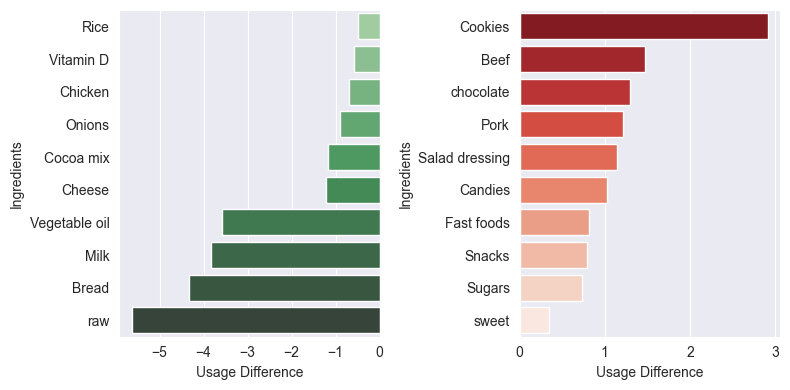

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sort the DataFrame based on 'Usage Difference'
sorted_df = ingredient_counts.sort_values(by='Usage Difference')

# Select the top 10 and bottom 10 ingredients
top_10 = sorted_df.tail(10)
bottom_10 = sorted_df.head(10)

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

# Top 10
sns.barplot(x='Usage Difference', y='Ingredients', data=top_10[::-1], ax=axes[1], palette='Reds_r')
axes[1].set_xlabel('Usage Difference')
axes[1].tick_params(axis='x')

# Bottom 10
sns.barplot(x='Usage Difference', y='Ingredients', data=bottom_10[::-1], ax=axes[0], palette='Greens_d')
axes[0].set_xlabel('Usage Difference')
axes[0].tick_params(axis='x')

plt.tight_layout()
plt.show()



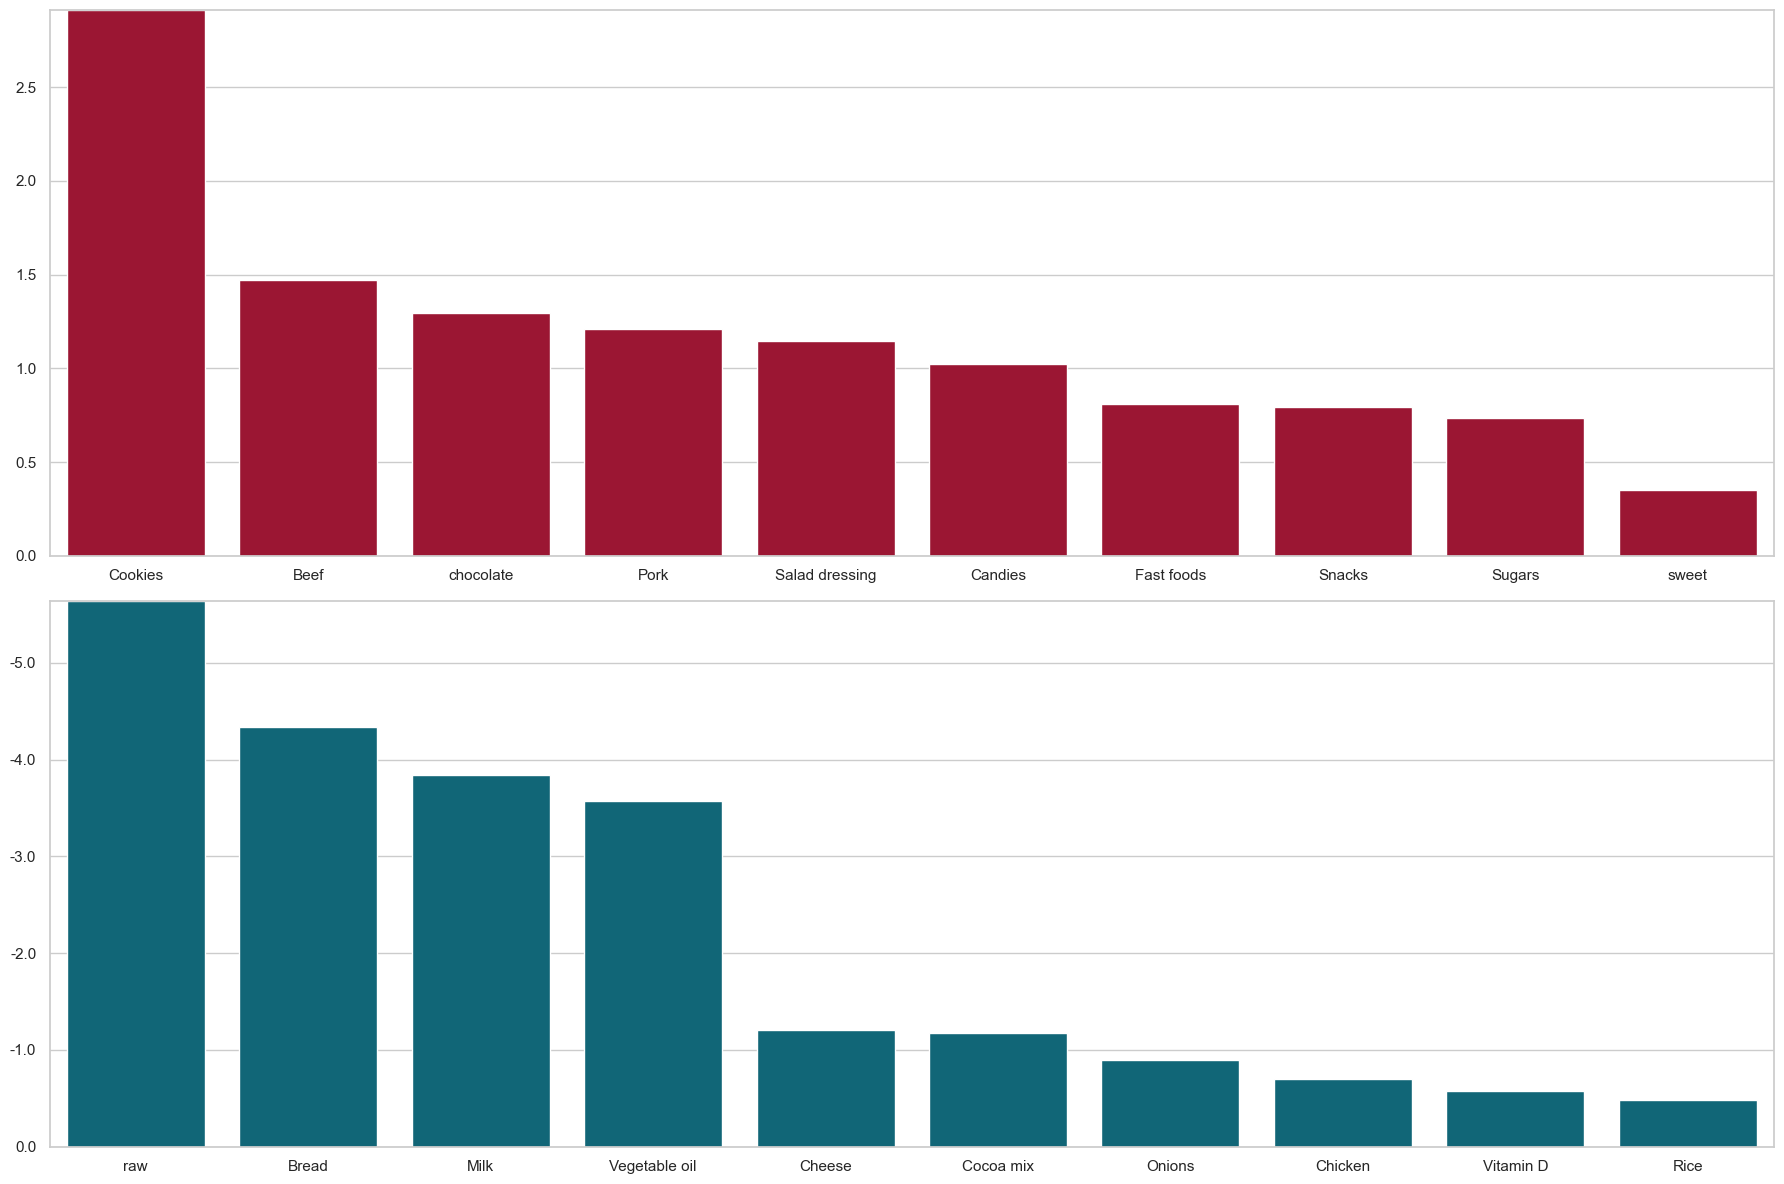

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming ingredient_counts is a pre-defined DataFrame
# ingredient_counts = pd.DataFrame(...) # Define your DataFrame here

# Sort the DataFrame based on 'Usage Difference'
sorted_df = ingredient_counts.sort_values(by='Usage Difference')

# Select the top 10 and bottom 10 ingredients
top_10 = sorted_df.tail(10)
bottom_10 = sorted_df.head(10)

# Create side-by-side subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))

# Plotting Top 10
sns.barplot(y='Usage Difference', x='Ingredients', data=top_10[::-1], ax=axes[0], color='#B10026')  # Dark Red
axes[0].set_title('')
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x')
axes[0].set_ylim(0, top_10['Usage Difference'].max())  # Set y-axis limit
axes[0].yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

# Plotting Bottom 10
sns.barplot(y='Usage Difference', x='Ingredients', data=bottom_10, ax=axes[1], color='#007188')  # Navy Blue
axes[1].set_title('')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x')
axes[1].set_ylim(bottom_10['Usage Difference'].min(), 0)  # Set y-axis limit
axes[1].invert_yaxis()
axes[1].yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

# Improve layout
plt.tight_layout()
plt.show()



In [99]:
import matplotlib.pyplot as plt

# Define the formula
formula = r'$G_{\text{refined}} = \bigcup_{i=1}^{n} G_{\text{meta-path}_i}$'

# Create a figure with white background
fig = plt.figure(figsize=(6, 1))
fig.patch.set_facecolor('white')

# Add the formula text
plt.text(0.5, 0.5, formula, fontsize=16, ha='center', va='center', family='Arial', style='italic')

# Remove axes
plt.axis('off')

# Save the figure
plt.savefig('formula.png', dpi=300, bbox_inches='tight', pad_inches=0.5)

# Show the plot for screenshot
plt.show()

ValueError: 
G_{\text{refined}} = \bigcup_{i=1}^{n} G_{\text{meta-path}_i}
   ^
ParseSyntaxException: Unknown symbol: \text, found '\'  (at char 3), (line:1, col:4)

Error in callback <function _draw_all_if_interactive at 0x0000022D0738C790> (for post_execute):


ValueError: 
G_{\text{refined}} = \bigcup_{i=1}^{n} G_{\text{meta-path}_i}
   ^
ParseSyntaxException: Unknown symbol: \text, found '\'  (at char 3), (line:1, col:4)

ValueError: 
G_{\text{refined}} = \bigcup_{i=1}^{n} G_{\text{meta-path}_i}
   ^
ParseSyntaxException: Unknown symbol: \text, found '\'  (at char 3), (line:1, col:4)

<Figure size 600x100 with 1 Axes>